# Projekt końcowy część 1 - obróbka danych

## Instrukcja

1. Poprawne wczytanie danych z pliku

2. Usunięcie kolumn które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

3. Usunięcie kolumn ze zbędnymi informacjami

4. Usunięcie kolumn tylko jedną unikalną wartością

5. Rzut okiem na wartości w kolumnie ze statusem pożyczki

6. Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

7. Analiza brakujących wartości wraz z ich uzupełnieniem/usunięciem przy wzięciu pod uwagę pewnych ustalonych kryteriów

## Załadowanie i obejrzenie bazy

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/projekt_koncowy/Loan_data.csv', low_memory=False)

In [ ]:
df.index = np.arange(1, len(df) + 1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(42536, 151)

In [ ]:
df.id.nunique()

42536

In [ ]:
#sprawdzam procentowo liczbę nanów w pozostałych kolumnach
a = 100*(df.isnull().sum()/len(df.index))
a[a>0.000]

member_id                100.000000
loan_amnt                  0.002351
funded_amnt                0.002351
funded_amnt_inv            0.002351
term                       0.002351
                            ...    
settlement_status         99.623848
settlement_date           99.623848
settlement_amount         99.623848
settlement_percentage     99.623848
settlement_term           99.623848
Length: 150, dtype: float64

## Usunięcie kolumn

In [ ]:
# usuwam kolumny z informacjami z przyszłości
df = df.drop([
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'total_acc',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    'last_fico_range_high',
    'last_fico_range_low',
    'mths_since_last_delinq',
    'recoveries',
    'collection_recovery_fee',
    'debt_settlement_flag',
    'issue_d'], axis = 1)

In [ ]:
# loan_status  target
target = df['loan_status']

In [ ]:
df.shape

(42536, 122)

In [ ]:
# usuwam kolumny, które mają więcej niż 35% brakujących danych 
df = df[[c for c in df if df[c].isnull().sum() < (42536*0.35)]] 
df.shape

(42536, 44)

In [ ]:
# usuwam kolumny ze zbędnymi informacjami
#są 2 kolumny id - nie potrzebuję dwóch
#zip_code - 3 pierwsze cyfry kodu nic nam nie mówią
#url - nie potrzebujemy linku do strony LC z danymi aukcji.
df = df.drop(['id', 'url', 'zip_code'], axis = 1)

In [ ]:
# wyszukanie kolumn z tylko jedną unikalną wartością
#df.loc[:, df.nunique() == 1]

In [ ]:
# usuwam kolumny z tylko jedną unikalną wartością
df = df.loc[:, df.nunique() != 1]
df.shape

(42536, 32)

In [ ]:
## sprawdzam emp_title

In [ ]:
df.emp_title.nunique()

30658

In [ ]:
df.emp_title.head()

1                         NaN
2                       Ryder
3                         NaN
4         AIR RESOURCES BOARD
5    University Medical Group
Name: emp_title, dtype: object

In [ ]:
df.drop(['emp_title'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

loan_amnt                   1
funded_amnt                 1
funded_amnt_inv             1
term                        1
int_rate                    1
installment                 1
grade                       1
sub_grade                   1
emp_title                2627
emp_length               1113
home_ownership              1
annual_inc                  5
verification_status         1
loan_status                 1
desc                    13294
purpose                     1
title                      14
addr_state                  1
dti                         1
delinq_2yrs                30
earliest_cr_line           30
fico_range_low              1
fico_range_high             1
inq_last_6mths             30
open_acc                   30
pub_rec                    30
revol_bal                   1
revol_util                 91
acc_now_delinq             30
delinq_amnt                30
pub_rec_bankruptcies     1366
tax_liens                 106
dtype: int64

## Wypełnienie NaNów

In [ ]:
#sprawdzam zawartości kolejnych kolumn, z dużą liczbą naanów - i albo usuwam kolumnę, albo uzupełniam

In [ ]:
## wstawiam w kolumnie "desc" w miejsca naanów informację 'no_desc'
df.desc = df.desc.fillna('no_desc')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
## sprawdzam pub_rec_bankruptcies

In [ ]:
df.pub_rec_bankruptcies.head()

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
df.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

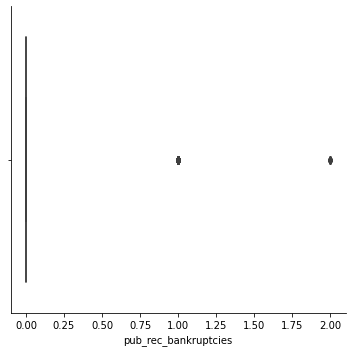

In [ ]:
# df.pub_rec_bankruptcies.plot()
sns.catplot(x="pub_rec_bankruptcies", kind="box", data=df)

In [ ]:
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0], inplace = True)
#bez tego [0] komórki się nie uzupełniają

## Zmiana formatu danych emp_lenght, ograniczenie liczby różnych wartości w kolumnie title

In [ ]:
## sprawdzam emp_length

In [ ]:
df.emp_length.value_counts() 

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [ ]:
## modyfikuję kolumnę emp_length tak by zawierała int
## (zamiast "10+years" --> int(10))

def leave_only_digits(rec):
    new_rec = []
    if type(rec) == float:
        return rec
    for char in rec:      
        if char.isdigit():
            new_rec.append(char)
    return int(''.join(new_rec))    


df['emp_length'] = df.emp_length.apply(leave_only_digits)

In [ ]:
df.emp_length.mode()

0    10.0
dtype: float64

In [ ]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

In [ ]:
## sprawdzam kolumnę title

In [ ]:
df.title.nunique()

21264

In [ ]:
df.title.value_counts()

Debt Consolidation                  2259
Debt Consolidation Loan             1760
Personal Loan                        708
Consolidation                        547
debt consolidation                   532
                                    ... 
CitiCard PayOff                        1
Taxes Loan                             1
Blazing in 5 years                     1
I was scammed and now recovering       1
Aroundthehouse                         1
Name: title, Length: 21264, dtype: int64

In [ ]:
# uwspólniam nazwy wszystkich rekordów zawierających słówko "consolidation"
mask = df['title'].str.contains(pat = 'onsolidation', na=True)
df.loc[mask, 'title'] = 'consolidation'

In [ ]:
# modyfikuję kolumnę title   1 - konsolidacja długu, 0 - wszystkie inne
def change_value(rec):
    if rec == 'consolidation':
      rec = 1
    else:
       rec = 0
    return rec
      
df['title'] = df.title.apply(change_value)


In [ ]:
df.title.value_counts()
# 1 - konsolidacja długu, 0 - wszystkie inne

0    33443
1     9093
Name: title, dtype: int64

In [ ]:
df.shape

(42536, 31)

In [ ]:
df.isna().sum()

loan_amnt                 1
funded_amnt               1
funded_amnt_inv           1
term                      1
int_rate                  1
installment               1
grade                     1
sub_grade                 1
emp_length                0
home_ownership            1
annual_inc                5
verification_status       1
loan_status               1
desc                      0
purpose                   1
title                     0
addr_state                1
dti                       1
delinq_2yrs              30
earliest_cr_line         30
fico_range_low            1
fico_range_high           1
inq_last_6mths           30
open_acc                 30
pub_rec                  30
revol_bal                 1
revol_util               91
acc_now_delinq           30
delinq_amnt              30
pub_rec_bankruptcies      0
tax_liens               106
dtype: int64

## Usunięcie rekordów zawierających NaNy

In [ ]:
# usuwam rekordy, które mają nany 
df.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
df.shape

(42370, 31)

## Sprawdzenie jak wygąda baza na tym etapie, dalsza modyfikacja

In [ ]:
# sprawdzam jak teraz wygląda baza i co jeszcze wymaga modyfikacji
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
df.loc[0:5,'loan_amnt':'home_ownership'].head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
1,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT
2,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,1.0,RENT
3,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10.0,RENT


In [ ]:
# modyfikuję wartości w kolumnie term, by były samymi int
df['term'] = df.term.apply(leave_only_digits)

In [ ]:
# usuwam % z kolumny int_rate i zmieniam typ na float
df['int_rate'] = df['int_rate'].str.rstrip("%").astype(float) 

In [ ]:
# zmieniam nazwę tej kolumny by było wiadomo, że dane są podane w procentach
df.rename(columns={'int_rate':'int_rate_in_percent'}, inplace = True)

In [ ]:
# sprawdzam korelację dwóch kolumn, które zgodnie z opisem zawierają zbieżne dane
df.funded_amnt.corr(df.funded_amnt_inv)

0.9480690307567036

In [ ]:
df.drop(['funded_amnt_inv'], axis = 1, inplace = True)

In [ ]:
df.loc[0:5,'annual_inc':'fico_range_low'].head(3)

,annual_inc,verification_status,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low
1,24000.0,Verified,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,0,AZ,27.65,0.0,Jan-1985,735.0
2,30000.0,Source Verified,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,0,GA,1.00,0.0,Apr-1999,740.0
3,12252.0,Not Verified,Fully Paid,no_desc,small_business,0,IL,8.72,0.0,Nov-2001,735.0


In [ ]:
# zmieniam tytuł "title" na bardziej informacyjny
df.rename(columns={'title':'title(consolidation/not)'}, inplace = True)

In [ ]:
# zmieniam format danych w kolumnie .earliest_cr_line z object na datetime
df.earliest_cr_line = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

In [ ]:
df.earliest_cr_line.dtypes

dtype('<M8[ns]')

In [ ]:
df.loc[0:5,'fico_range_high':'tax_liens'].head(3)

,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,739.0,1.0,3.0,0.0,13648.0,83.7%,0.0,0.0,0.0,0.0
2,744.0,5.0,3.0,0.0,1687.0,9.4%,0.0,0.0,0.0,0.0
3,739.0,2.0,2.0,0.0,2956.0,98.5%,0.0,0.0,0.0,0.0


In [ ]:
# usuwam "%" z kolumny revol_util zamieniam na type float
df['revol_util'] = df['revol_util'].str.rstrip("%").astype(float) 

In [ ]:
# zmieniam nazwę kolumny, by było wiadomo, że dane są podane w procentach
df.rename(columns={"revol_util":"revol_util_in_percent"}, inplace = True)

In [ ]:
# sprawdzam kolumnę pub_rec.value
df.pub_rec.value_counts()

0.0    40001
1.0     2291
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [ ]:
# sprawdzam korelację dwóch kolumn, które z opisy wyglądają na zawierające podobne dane
df.pub_rec.corr(df.pub_rec_bankruptcies)

0.8251116957500485

In [ ]:
# usuwam kolumnę pub_rec  (wysoka korelacja z pub_rec_bankruptcies; dublujące się informacje )
df.drop('pub_rec', axis = 1, inplace = True)

In [ ]:
df.acc_now_delinq.value_counts()

0.0    42367
1.0        3
Name: acc_now_delinq, dtype: int64

In [ ]:
# usuwam kolumnę acc_now_delinq, bo praktycznie nunique = 1
df.drop(['acc_now_delinq'], axis = 1, inplace = True)

In [ ]:
df.delinq_amnt.value_counts()

0.0     42369
27.0        1
Name: delinq_amnt, dtype: int64

In [ ]:
# usuwam kolumnę delinq_amnt, bo praktycznie nunique = 1
df.drop(['delinq_amnt'], axis = 1, inplace = True)

In [ ]:
df.tax_liens.value_counts()

0.0    42369
1.0        1
Name: tax_liens, dtype: int64

In [ ]:
# usuwam kolumnę tax_liens, bo praktycznie nunique = 1
df.drop(['tax_liens'], axis = 1, inplace = True)

In [ ]:
df.shape

(42370, 26)

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate_in_percent',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'desc', 'purpose',
       'title(consolidation/not)', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util_in_percent',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42370 entries, 1 to 42479
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 42370 non-null  float64       
 1   funded_amnt               42370 non-null  float64       
 2   term                      42370 non-null  int64         
 3   int_rate_in_percent       42370 non-null  float64       
 4   installment               42370 non-null  float64       
 5   grade                     42370 non-null  object        
 6   sub_grade                 42370 non-null  object        
 7   emp_length                42370 non-null  float64       
 8   home_ownership            42370 non-null  object        
 9   annual_inc                42370 non-null  float64       
 10  verification_status       42370 non-null  object        
 11  loan_status               42370 non-null  object        
 12  desc              

In [ ]:
path = '/content/drive/My Drive/projekt_koncowy/Loan_data_after_part_1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)